# Problem description
We have two .txt files with reviews and labels for them. The task is to create RNN with LSTM cell that will learn to differ positive and negative reviews.  

```reviews.txt``` - file with reviews, the reviews are separated with ```'\n'```  .  
```labels.txt``` - file with labels, consists of words ```'positive', 'negative'```.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# read data from text files
with open('data/reviews.txt', 'r') as f:
    reviews = f.read()
with open('data/labels.txt', 'r') as f:
    labels = f.read()

In [2]:
print(reviews[:1000])
print()
print(labels[:101])

bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   
story of a man who has unnatural feelings for a pig . starts out with a opening scene that is a terrific example of absurd comedy . a formal orchestra audience is turn

# Preprocessing
We need to delete all punctuation from text and transform everything to lowercase

In [3]:
from string import punctuation

print(punctuation)

# Delete all punctuation
reviews = reviews.lower() # transform to lowercase
all_text = ''.join([c for c in reviews if c not in punctuation])

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


All reviews will be separated by '\n'. Later we will create a vocabulary of unique words.

In [4]:
# Separate the reviews
reviews_split = all_text.split('\n')

# Join them to create one text
all_text = ' '.join(reviews_split)

In [5]:
# Create list of all words
words = all_text.split()

In [6]:
print(len(words))
words[:30]

6020196


['bromwell',
 'high',
 'is',
 'a',
 'cartoon',
 'comedy',
 'it',
 'ran',
 'at',
 'the',
 'same',
 'time',
 'as',
 'some',
 'other',
 'programs',
 'about',
 'school',
 'life',
 'such',
 'as',
 'teachers',
 'my',
 'years',
 'in',
 'the',
 'teaching',
 'profession',
 'lead',
 'me']

# Task 1
### Encode the reviews
Firstly, we will create a vocabulary ```vocab_to_int``` of all unique words. Each word in the vocabulary  
will have its own number(e.g. ```{'movie' : 1, 'great' : 2, ... 'bad' : 31321}```). 0 is reserved for ```'\n'```.  
Secondly, all reviews will be encoded as follows:  
Each word will be replaced with its number from the vocabulary.

In [7]:
from collections import Counter
import tqdm

vocab_to_int = dict()

reviews_ints = list()


In [8]:
counter = Counter()

for word in words:
    counter[word] += 1
    
unique_words = list(counter)
print(len(unique_words)) # shoulde be more 74000

74072


In [9]:
vocab_to_int['\n'] = 0

for i, word in enumerate(unique_words):
    vocab_to_int[word] = i + 1 # 0 is reserved for "\n"
    
print(len(vocab_to_int))

74073


In [10]:
reviews_split[:2]

['bromwell high is a cartoon comedy  it ran at the same time as some other programs about school life  such as  teachers   my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers   the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students  when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled          at           high  a classic line inspector i  m here to sack one of your teachers  student welcome to bromwell high  i expect that many adults of my age think that bromwell high is far fetched  what a pity that it isn  t   ',
 'story of a man who has unnatural feelings for a pig  starts out with a opening scene that is a terrific example of absurd comedy  a formal orchestra audience is turned into an insane  viol

In [11]:
# Encoding the reviews
for review in reviews_split:
    
    encoded_review = list()
    
    for word in review.split():
        
        idx = vocab_to_int[word]
        encoded_review.append(idx)
        
    reviews_ints.append(encoded_review)

In [12]:
print('Unique words: ', len((vocab_to_int)))  # should ~ 74000+
print()

print('Tokenized review: \n', reviews_ints[:1])

Unique words:  74073

Tokenized review: 
 [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 13, 21, 22, 23, 24, 10, 25, 26, 27, 28, 29, 30, 31, 1, 2, 32, 33, 3, 34, 35, 29, 36, 37, 3, 21, 10, 38, 29, 39, 40, 10, 41, 42, 43, 44, 45, 46, 47, 48, 49, 21, 50, 10, 51, 52, 10, 53, 54, 55, 56, 28, 52, 10, 57, 58, 59, 60, 48, 42, 61, 58, 62, 10, 63, 24, 64, 4, 65, 66, 67, 29, 68, 69, 10, 18, 58, 70, 71, 9, 2, 4, 72, 73, 74, 58, 75, 76, 29, 77, 78, 52, 79, 21, 65, 80, 29, 1, 2, 58, 81, 31, 82, 83, 52, 22, 84, 85, 31, 1, 2, 3, 86, 87, 88, 4, 89, 31, 7, 90, 91]]


# Task 2
### Encode the target variable
```'positive'``` == 1  
```'negative'``` == 0

In [13]:
encoded_labels = list()

In [14]:
for label in labels.split('\n'):
    
    encoded_labels.append(1 if label == 'positive' else 0)
    
encoded_labels[:10]

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

(array([12501.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 12500.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

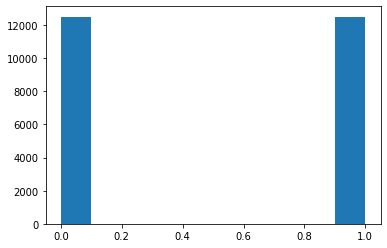

In [15]:
plt.hist(encoded_labels)

As we can see, the numbers of positive and negative reviews are practically the same.

# Task 3  
### Delete outliers
We need to delete reviews that are either too short or too long.

In [16]:
# Save copies
orig_reviews_ints = reviews_ints.copy()
orig_encoded_labels = encoded_labels.copy()

In [17]:
f = lambda x: len(x)
lengths = list(map(f, reviews_ints))
lengths[:2]

[140, 114]

Distribution of reviews by length

(array([1.7122e+04, 5.7330e+03, 1.4850e+03, 5.2700e+02, 1.1800e+02,
        8.0000e+00, 4.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0. ,  251.4,  502.8,  754.2, 1005.6, 1257. , 1508.4, 1759.8,
        2011.2, 2262.6, 2514. ]),
 <a list of 10 Patch objects>)

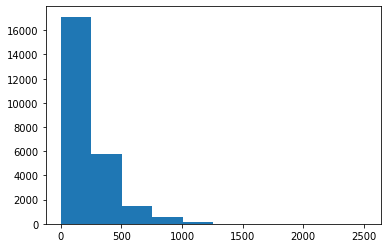

In [18]:
plt.hist(lengths)

In [19]:
print('Mean length:', np.mean(lengths))

Mean length: 240.79820807167712


Delete all reviews that are shorter than 1% percentile, and longer than 99% percentile

In [20]:
perc_1 = np.percentile(lengths, 1)
perc_99 = np.percentile(lengths, 99)
print('1% percentile:', perc_1)
print('99% percentile:', perc_99)

1% percentile: 43.0
99% percentile: 935.0


In [21]:
print('Number of reviews before removing outliers: ', len(reviews_ints))
for i, review in enumerate(reviews_ints):
    
    if len(review) > perc_99 or len(review) < perc_1:
        del reviews_ints[i]
        del encoded_labels[i]
        
print('Number of reviews after removing outliers: ', len(reviews_ints))
print('Mean length:', np.mean(list(map(f, reviews_ints))))

Number of reviews before removing outliers:  25001
Number of reviews after removing outliers:  24532
Mean length: 234.63027881950106


# Task 4  
### Padding and truncate
All reviews should be the same length, so if review is shorter than ```seq_length``` we will pad it with {```'\n'``` : 0}  
on the left side (e.g. ```review = [1, 2, 3, 123, .. 66], len(review) = 199 -> pad(review) = [0, 1, 2, 3, 123 ... , 66]```).  
If it's longer than ```seq_length``` then we will remove last tokens.

In [22]:
seq_length = 200

In [23]:
def pad_features(reviews_ints, seq_length, token):
    ''' Return features of review_ints, where each review is padded with 0's 
        or truncated to the input seq_length.
    '''
    def left_pad(review, seq_length, token):
    
        pad = [token for i in range(seq_length - len(review))]
        # Add list of [token, ... , token] in the beginning
        review[:0] = pad
    
        return review
    
    
    features = list()
    
    for review in reviews_ints:
        
        if len(review) < seq_length:
            review = left_pad(review, seq_length, token)
            
        else:
            review = review[:seq_length]
            
        features.append(review)
            
    return features

In [24]:
features = pad_features(reviews_ints, seq_length=seq_length, token = vocab_to_int['\n'])

assert len(features)==len(reviews_ints), "Your features should have as many rows as reviews."
assert len(features[0])==seq_length, "Each feature row should contain seq_length values."

print(features[:10])

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 13, 21, 22, 23, 24, 10, 25, 26, 27, 28, 29, 30, 31, 1, 2, 32, 33, 3, 34, 35, 29, 36, 37, 3, 21, 10, 38, 29, 39, 40, 10, 41, 42, 43, 44, 45, 46, 47, 48, 49, 21, 50, 10, 51, 52, 10, 53, 54, 55, 56, 28, 52, 10, 57, 58, 59, 60, 48, 42, 61, 58, 62, 10, 63, 24, 64, 4, 65, 66, 67, 29, 68, 69, 10, 18, 58, 70, 71, 9, 2, 4, 72, 73, 74, 58, 75, 76, 29, 77, 78, 52, 79, 21, 65, 80, 29, 1, 2, 58, 81, 31, 82, 83, 52, 22, 84, 85, 31, 1, 2, 3, 86, 87, 88, 4, 89, 31, 7, 90, 91], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 92, 52, 4, 93, 43, 94,

In [25]:
features = np.array(features)
encoded_labels = np.array(encoded_labels)
print(f'Data shape: {features.shape}\nTarget shape: {encoded_labels.shape}')

Data shape: (24532, 200)
Target shape: (24532,)


# Task 5
### Creating train, validation, test datasets

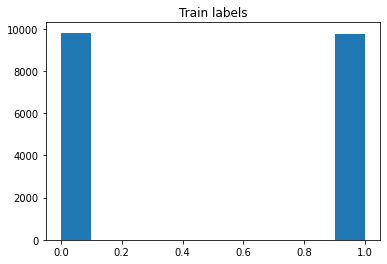

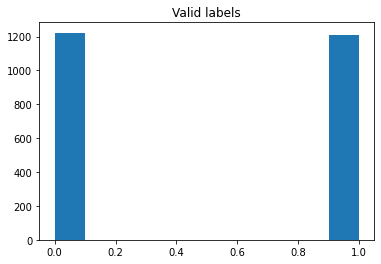

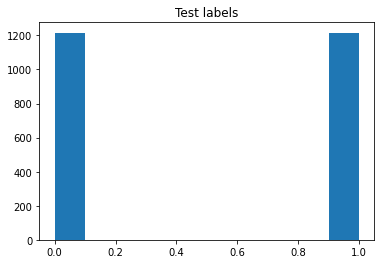

Training set shape: (19584, 200)
Validation set shape: (2432, 200)
Test set shape: (2432, 200)


In [26]:
split_frac = 0.8
# for dataloaders
batch_size = 64

train_len = int(features.shape[0] * split_frac)
valid_len = (features.shape[0] - train_len) // 2
test_len  = features.shape[0] - train_len - valid_len

train_features = features[:train_len - train_len % batch_size]
train_labels = encoded_labels[:train_len - train_len % batch_size]
plt.hist(train_labels)
plt.title('Train labels')
plt.show()

valid_features = features[train_len : train_len + valid_len - valid_len % batch_size]
valid_labels = encoded_labels[train_len : train_len + valid_len - valid_len % batch_size]
plt.hist(valid_labels)
plt.title('Valid labels')
plt.show()

test_features = features[train_len + valid_len : features.shape[0] - test_len % batch_size]
test_labels = encoded_labels[train_len + valid_len : features.shape[0] - test_len % batch_size]
plt.hist(test_labels)
plt.title('Test labels')
plt.show()

assert train_features.shape[0] == train_labels.shape[0]
assert valid_features.shape[0] == valid_labels.shape[0]
assert test_features.shape[0] == test_labels.shape[0]

print(f'Training set shape: {train_features.shape}\nValidation set shape: {valid_features.shape}\nTest set shape: {test_features.shape}')

In [27]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_features), torch.from_numpy(train_labels))
valid_data = TensorDataset(torch.from_numpy(valid_features), torch.from_numpy(valid_labels))
test_data = TensorDataset(torch.from_numpy(test_features), torch.from_numpy(test_labels))

# Shuffle data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [28]:
torch.manual_seed(0)
np.random.seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [29]:
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([64, 200])
Sample input: 
 tensor([[    0,     0,     0,  ...,   292,  1655, 14735],
        [   58,   127,    62,  ...,   704,  6827,     9],
        [   10,   704,   261,  ...,   248,   101, 18146],
        ...,
        [  212,   212,   342,  ...,   465,    34,   251],
        [   58,   576,   768,  ...,    31,   139,  9568],
        [   58,  1144,  2940,  ..., 22729,  3651,    52]])

Sample label size:  torch.Size([64])
Sample label: 
 tensor([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0])


In [30]:
train_on_gpu = torch.cuda.is_available()

if train_on_gpu is True:
    device = torch.device('cuda:0')
    print(f'Using GPU ({torch.cuda.get_device_name()})')
else:
    device = torch.device('cpu')
    print('Using CPU')

Using GPU (Tesla T4)


# Task 6
### Creating RNN with LSTM cell

In [31]:
from models import SentimentRNN

# Task 7
### Creating an object of a neural network class  
The object is created with the following hyperparameters:  
- ```vocab_size```: The size of the vocabulary (for the embedding layer)
- ```output_size```: Size of the result vector on the neural network (1 in case of binary classification)
- ```embedding_dim```: Number of features of embedding vectors
- ```hidden_dim```: Number of "neurons" in the hidden layer of the LSTM cell. Usually the more, the better. Values that can be considered as a first approximation: 128, 256, 512, etc.
- ```n_layers```: Number of LSTM layers. A good first approximation might be 1-3

In [32]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)
output_size = 1
embedding_dim = 256
hidden_dim = 512
n_layers = 2

net = SentimentRNN(vocab_size, output_size, embedding_dim, hidden_dim, n_layers, device = device)

print(net)

SentimentRNN(
  (embedding): Embedding(74073, 256)
  (lstm): LSTM(256, 512, num_layers=2, batch_first=True)
  (fc1): Linear(in_features=512, out_features=1, bias=True)
)


# Task 8
### Implementing training loop

In [33]:
# Loss function and optimizer
init_lr=0.005
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr = init_lr)

In [34]:
epochs = 4
counter = 0
print_every = 100
clip = 5
valid_loss_min = 10000

net.to(device)

net.train()
for i in range(epochs):
    h = net.init_hidden(batch_size)
    
    for inputs, labels in train_loader:
        counter += 1
        h = tuple([e.data for e in h])
        inputs, labels = inputs.to(device), labels.to(device)
        net.zero_grad()
        output, h = net(inputs, h)
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        torch.nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()
        
        if counter % print_every == 0:
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for val_inputs, val_labels in valid_loader:
                val_h = tuple([each.data for each in val_h])
                val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
                out, val_h = net(val_inputs, val_h)
                val_loss = criterion(out.squeeze(), val_labels.float())
                val_losses.append(val_loss.item())
                
            net.train()
            print("Epoch: {}/{}...".format(i+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))
            if np.mean(val_losses) <= valid_loss_min:
                torch.save(net, './best_model.pth')
                print('----Best model----'.format(np.mean(val_losses)))
                valid_loss_min = np.mean(val_losses)

Epoch: 1/4... Step: 100... Loss: 0.698483... Val Loss: 0.693173
----Best model----
Epoch: 1/4... Step: 200... Loss: 0.691078... Val Loss: 0.693024
----Best model----
Epoch: 1/4... Step: 300... Loss: 0.705243... Val Loss: 0.694961
Epoch: 2/4... Step: 400... Loss: 0.645670... Val Loss: 0.679352
----Best model----
Epoch: 2/4... Step: 500... Loss: 0.623837... Val Loss: 0.647502
----Best model----
Epoch: 2/4... Step: 600... Loss: 0.504887... Val Loss: 0.519781
----Best model----
Epoch: 3/4... Step: 700... Loss: 0.394670... Val Loss: 0.471727
----Best model----
Epoch: 3/4... Step: 800... Loss: 0.484172... Val Loss: 0.447149
----Best model----
Epoch: 3/4... Step: 900... Loss: 0.302407... Val Loss: 0.440780
----Best model----
Epoch: 4/4... Step: 1000... Loss: 0.208551... Val Loss: 0.488797
Epoch: 4/4... Step: 1100... Loss: 0.252580... Val Loss: 0.496592
Epoch: 4/4... Step: 1200... Loss: 0.131571... Val Loss: 0.504158


# Task 9
### Evaluating model on the test set

In [35]:
test_losses = []
num_correct = 0
model = torch.load('./best_model.pth')
model.eval()
h = model.init_hidden(batch_size)

for inputs, labels in test_loader:
    inputs, labels = inputs.to(device), labels.type(torch.FloatTensor).to(device)
    h = tuple([each.data for each in h])
    output, h = model(inputs, h)
    
    # calculate loss
    test_loss = criterion(output, labels)
    test_losses.append(test_loss.item())
    
    # output -> label
    pred = output.round()
    num_correct += pred.eq(labels.view_as(pred)).sum().item()
    
    # Calculating accuracy

# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = 100 * num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 0.458
Test accuracy: 78.988


# Task 10
### Testing the network on custom reviews

In [36]:
# negative review
test_review_neg = 'The worst movie I have seen; acting was terrible and I want my money back. This movie had bad acting and the dialogue was slow.'

In [37]:
def predict(model, test_review, vocab_to_int, sequence_length=200):
    
    # Clean, pad/truncate, and encode the review
    test_review = test_review.lower() # transform to lowercase
    text = ''.join([c for c in test_review if c not in punctuation])
    text = text.split()
    # Encode
    encoded_text = list()
    for word in text:
        
        idx = vocab_to_int[word]
        encoded_text.append(idx)
    # Pad / truncate
    features = np.array(pad_features([encoded_text], sequence_length, token = vocab_to_int['\n']))
    #print(features)
    
    # Creating dataloader
    batch_size = 1
    dataset = TensorDataset(torch.from_numpy(features), torch.from_numpy(np.zeros_like(features)))
    loader = DataLoader(dataset, shuffle=False, batch_size=batch_size)
    
    h = net.init_hidden(batch_size)

    model.eval()
    for inputs, labels in loader:
        h = tuple([each.data for each in h])

        if(train_on_gpu):
            inputs= inputs.cuda()
    
        output, h = model(inputs, h)
        
        pred = torch.squeeze(output.round())

    return 'Positive' if pred == 1 else 'Negative'

In [38]:
# Positive review
test_review_pos = 'This movie had the best acting and the dialogue was so good. I loved it.'
# I don't know what review this is
test_review = 'The movie was bad. But I liked it.'

In [39]:
seq_length=200
neg_label = predict(model, test_review_neg, vocab_to_int, seq_length)
pos_label = predict(model, test_review_pos, vocab_to_int, seq_length)
test_label = predict(model, test_review, vocab_to_int, seq_length)

print(f'Negative review is predicted as {neg_label}')
print(f'Positive review is predicted as {pos_label}')
print(f'Mysterious review is predicted as {test_label}')

Negative review is predicted as Negative
Positive review is predicted as Positive
Mysterious review is predicted as Positive
